In [1]:
#### Importing the libraries ----
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
### Loading the dataset ----
data = pd.read_csv('C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 13/b88assignments/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/delivery_time.csv', sep = ',')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df = data.copy()
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA abd Data Visualisation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
df.shape

(21, 2)

In [6]:
df['Sorting Time'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: Sorting Time, dtype: int64

In [7]:
df['Delivery Time'].value_counts()

21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: Delivery Time, dtype: int64

In [11]:
#### Inference ---- The sorting varies from the a range of 2-10 but the delivery time for each entry is different

In [8]:
# Correlation Analysis
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64


In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


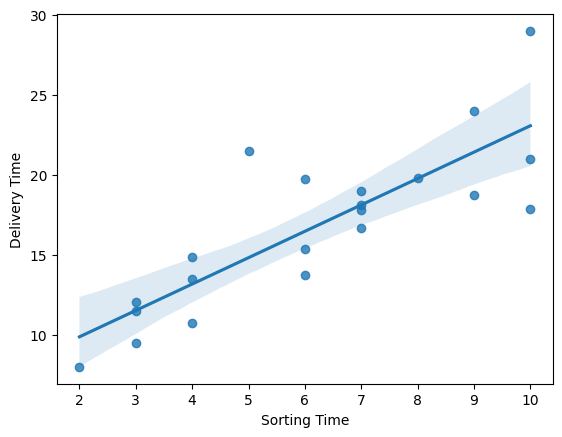

In [30]:
sns.regplot(x = 'Sorting Time', y = 'Delivery Time', data = df)
plt.savefig("reg_plot.png")
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_6476\3617047327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


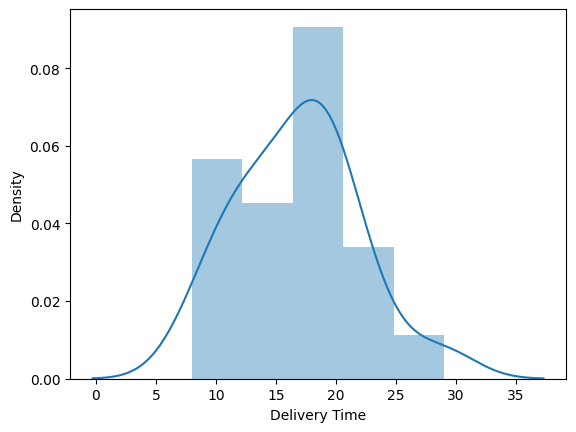

In [32]:
sns.distplot(df['Delivery Time'])
plt.savefig("Distplot of Delivery time.png")
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_6476\4165475417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


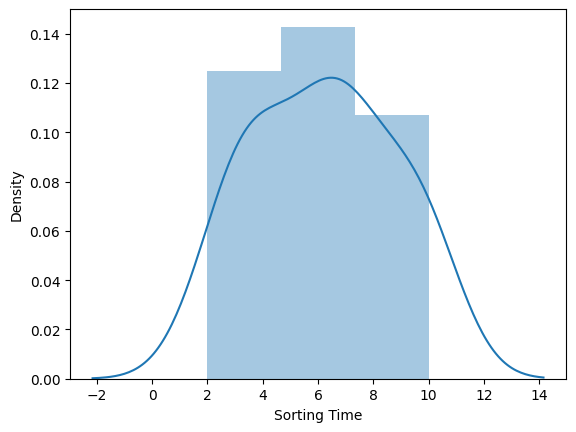

In [33]:
sns.distplot(df['Sorting Time'])
plt.savefig("Distplot of Sorting time.png")
plt.show()

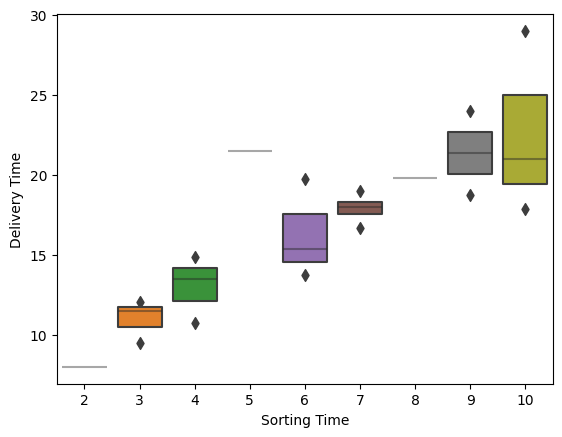

In [34]:
sns.boxenplot(x = 'Sorting Time', y = 'Delivery Time', data = df)
plt.savefig("Boxen plot.png")
plt.show()

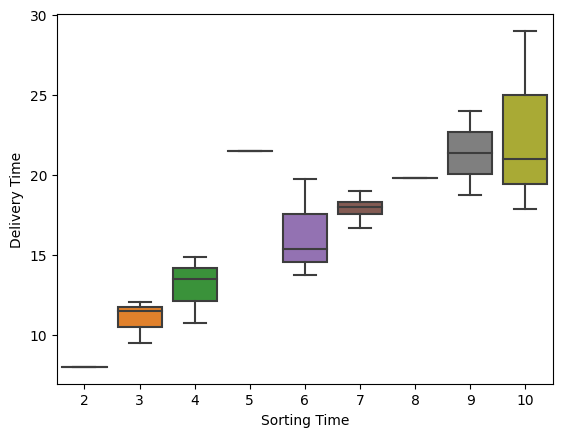

In [35]:
sns.boxplot(x = 'Sorting Time', y = 'Delivery Time', data = df)
plt.savefig("Box plot.png")
plt.show()

## Inference ----- As it is clear from the above graphs as the Sorting Time increases, the delivery time also increases which show a Directly Proportional relationship between Sorting time and Delivery time.

## Transforming dataset

In [17]:
x = df['Sorting Time'].values
x = x.reshape(-1,1)
print(x)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [18]:
y = df['Delivery Time'].values
y = y.reshape(-1,1)
print(y)

[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]


## Model Building

In [19]:
model = LinearRegression()
print(model)

LinearRegression()


In [20]:
#### Training the Model/Sytem  - By Fitting my data
model_fit = model.fit(x,y)
print(model_fit)

LinearRegression()


In [21]:
model_fit.coef_

array([[1.6490199]])

In [22]:
model_fit.intercept_

array([6.58273397])

In [23]:
predict = model_fit.predict(x)  #### Will be done on test data for validation and after that raw data
predict

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [24]:
##### Raw Data for Predictions
X1 = np.array([5,4,11,8,2])
X1
X1 = X1.reshape(-1,1)
X1

array([[ 5],
       [ 4],
       [11],
       [ 8],
       [ 2]])

In [25]:
model_fit.predict(X1).round(2)

array([[14.83],
       [13.18],
       [24.72],
       [19.77],
       [ 9.88]])